In [ ]:
pip install mne

In [ ]:
import mne

In [ ]:
edf3 = mne.io.read_raw_edf('chb01_03.edf')
edf4 = mne.io.read_raw_edf('chb01_04.edf')
edf15 = mne.io.read_raw_edf('chb01_15.edf')
edf16 = mne.io.read_raw_edf('chb01_16.edf')
edf18 = mne.io.read_raw_edf('chb01_18.edf')
edf21 = mne.io.read_raw_edf('chb01_21.edf')
edf26 = mne.io.read_raw_edf('chb01_26.edf')

In [ ]:
header = ','.join(edf3.ch_names)

df3 = np.savetxt('chb01_3.csv', edf3.get_data().T, delimiter=',', header=header)
df3 = pd.read_csv('chb01_3.csv')

df4 = np.savetxt('chb01_4.csv', edf4.get_data().T, delimiter=',', header=header)
df4 = pd.read_csv('chb01_4.csv')

df15 = np.savetxt('chb01_15.csv', edf15.get_data().T, delimiter=',', header=header)
df15 = pd.read_csv('chb01_15.csv')

df16 = np.savetxt('chb01_16.csv', edf16.get_data().T, delimiter=',', header=header)
df16 = pd.read_csv('chb01_16.csv')

df18 = np.savetxt('chb01_18.csv', edf18.get_data().T, delimiter=',', header=header)
df18 = pd.read_csv('chb01_18.csv')

df21 = np.savetxt('chb01_21.csv', edf21.get_data().T, delimiter=',', header=header)
df21 = pd.read_csv('chb01_21.csv')

df26 = np.savetxt('chb01_26.csv', edf26.get_data().T, delimiter=',', header=header)
df26 = pd.read_csv('chb01_26.csv')

In [4]:
import pandas as pd

In [83]:
df3 = pd.read_csv('chb01_3.csv')

df4 = pd.read_csv('chb01_4.csv')

df15 = pd.read_csv('chb01_15.csv')

df16 = pd.read_csv('chb01_16.csv')

df18 = pd.read_csv('chb01_18.csv')

df21 = pd.read_csv('chb01_21.csv')

df26 = pd.read_csv('chb01_26.csv')

In [84]:
df = pd.concat([df3,df4,df15,df16,df18,df21,df26])

In [85]:
df['Labels'] = 0
df = df.reset_index()

In [86]:
df = df.drop(['index'], axis=1)

In [87]:
df.loc[2996*256:3036*256,['Labels']] = 1

df.loc[3600*256+1467*256:3600*256+1494*256,['Labels']] = 1

df.loc[3600*256*2+1732*256:3600*256*2+1772*256,['Labels']] = 1

df.loc[3600*256*3+1015*256:3600*256*3+1066*256,['Labels']] = 1

df.loc[3600*256*4+1720*256:3600*256*4+1810*256,['Labels']] = 1

df.loc[3600*256*5+327*256:3600*256*5+420*256,['Labels']] = 1

df.loc[3600*256*6+1862*256:3600*256*6+1963*256,['Labels']] = 1

In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [22]:
import numpy as np

In [88]:
neg, pos = np.bincount(df['Labels'])
total = neg + pos
print('Muestras:\n   total: {}\n     Positivos: {} ({:.2f}% del total)\n'.format(total, pos, 100*pos / total))

Muestras:
   total: 6124800
     Positivos: 113159 (1.85% del total)



Text(0, 0.5, 'Cantidad total de muestas')

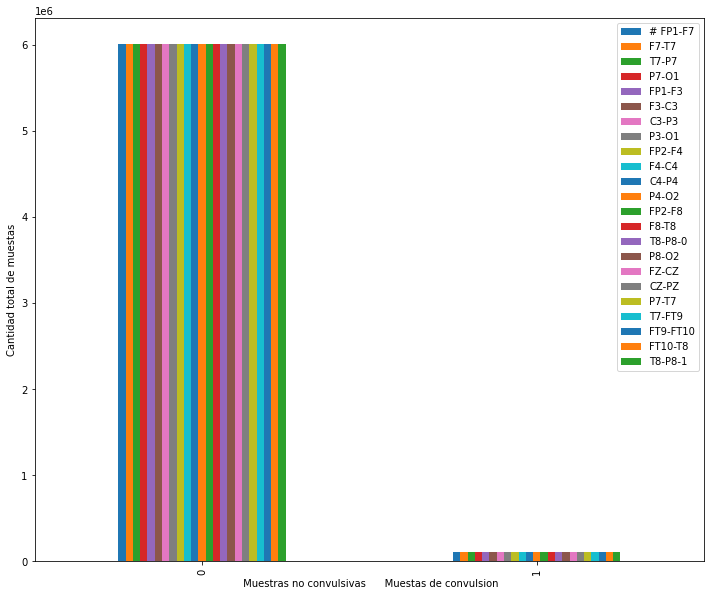

In [34]:
mpl.rcParams['figure.figsize'] = (12, 10)
df.groupby('Labels').count().plot(kind='bar')
plt.xlabel (' Muestras no convulsivas      Muestas de convulsion')
plt.ylabel('Cantidad total de muestas')

In [89]:
df.columns

Index(['# FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3',
       'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
       'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10',
       'FT10-T8', 'T8-P8-1', 'Labels'],
      dtype='object')

In [90]:
column_indices = {name: i for i, name in enumerate(df.columns)}
n = len(df)

In [91]:
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]#24

In [92]:
train_labels = np.array(train_df.pop('Labels'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Labels'))
test_labels = np.array(test_df.pop('Labels'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [76]:
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [93]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


Training labels shape: (4287360,)
Validation labels shape: (1224960,)
Test labels shape: (612480,)
Training features shape: (4287360, 23)
Validation features shape: (1224960, 23)
Test features shape: (612480, 23)


C:\Users\Dibio-hardpreform\miniconda2\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Dibio-hardpreform\miniconda2\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


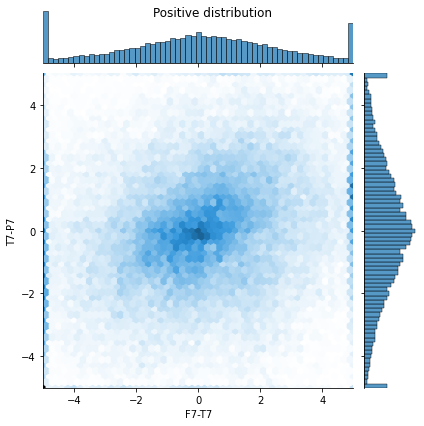

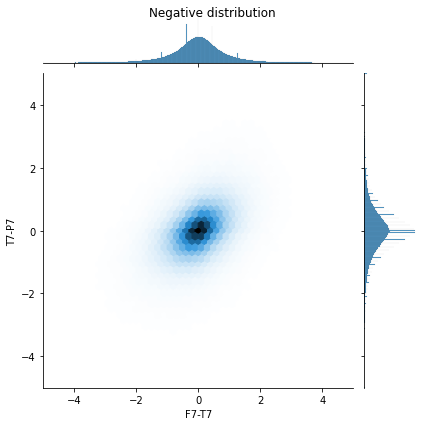

In [108]:
pos_df = pd.DataFrame(train_features[ bool_train_labels], columns = train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns = train_df.columns)

sns.jointplot(pos_df['F7-T7'], pos_df['T7-P7'],
              kind='hex', xlim = (-5,5), ylim = (-5,5))
plt.suptitle("Positive distribution")

sns.jointplot(neg_df['F7-T7'], neg_df['T7-P7'],
              kind='hex', xlim = (-5,5), ylim = (-5,5))
_ = plt.suptitle("Negative distribution")

C:\Users\Dibio-hardpreform\miniconda2\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


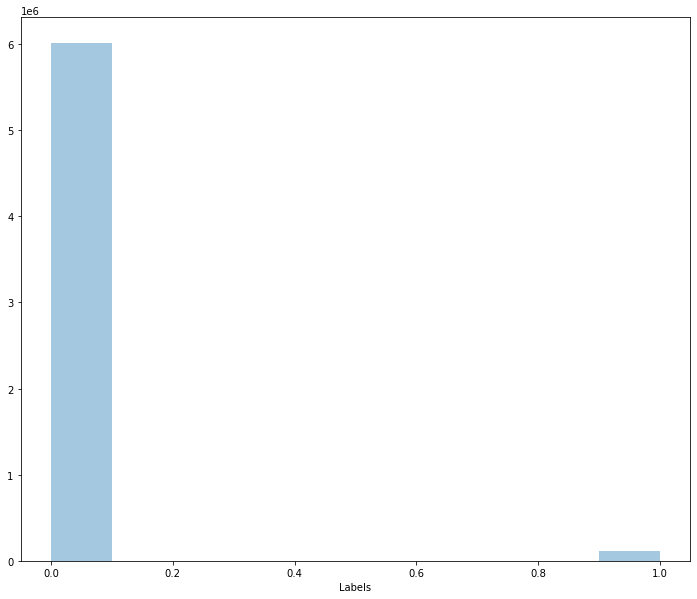

In [97]:
sns.distplot(df['Labels'],bins=10,kde=False)

In [100]:
import tensorflow as tf
from tensorflow import keras

In [101]:
# profundizar en el analicis de distribucion de los casos
METRICS = [
      keras.metrics.TruePositives(name='TP'),
      keras.metrics.FalsePositives(name='FP'),
      keras.metrics.TrueNegatives(name='TN'),
      keras.metrics.FalseNegatives(name='FN'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),#%TP
      keras.metrics.AUC(name='auc'),#%probabilidad de que un clasificador clasifique una muestra aleatoria positiva más alta que una muestra aleatoria negativa
]

###jugar con los pesos para ver si mejora el rendimiento #optiomizador Adam, pq no se ve afetadado x el cambio de escala 

In [106]:
weight_for_0 = (1 / neg)*(total)/2.0 # 2--> arbitrario
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.51
Weight for class 1: 27.06


In [113]:
def make_model(metrics = METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(300, activation='relu',input_shape=(train_features.shape[-1],)),
      keras.layers.Dense(100, activation='relu'),
      keras.layers.Dense(50, activation='relu'),
      keras.layers.Dense(20, activation='relu'),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(1, activation='sigmoid',bias_initializer=output_bias),
  ])
  model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),#probar con RMSprop
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [114]:
EPOCHS = 10
BATCH_SIZE = 1279

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [115]:
model = make_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 300)               7200      
_________________________________________________________________
dense_6 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_7 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_8 (Dense)              (None, 20)                1020      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 21        
Total params: 43,391
Trainable params: 43,391
Non-trainable params: 0
__________________________________________________

In [124]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 1.1078


###inicaiando las ordenadas al origen

In [119]:
initial_bias = np.log([pos/neg])

In [125]:
model = make_model(output_bias = initial_bias)
model.predict(train_features[:10])

array([[0.01799777],
       [0.01847571],
       [0.01847571],
       [0.018442  ],
       [0.01850763],
       [0.01877195],
       [0.01879302],
       [0.01833463],
       [0.0179817 ],
       [0.01860102]], dtype=float32)

In [126]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.0763


In [131]:
import os
import tempfile

In [132]:
initial_weights = os.path.join(tempfile.mkdtemp(),'initial_weights')
model.save_weights(initial_weights)

In [133]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [134]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [135]:
def plot_loss(history, label, n):
  # Use a log scale to show the wide range of values.
  plt.semilogy(history.epoch,  history.history['loss'],
               color=colors[n], label='Train '+label)
  plt.semilogy(history.epoch,  history.history['val_loss'],
          color=colors[n], label='Val '+label,
          linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  
  plt.legend()

In [137]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

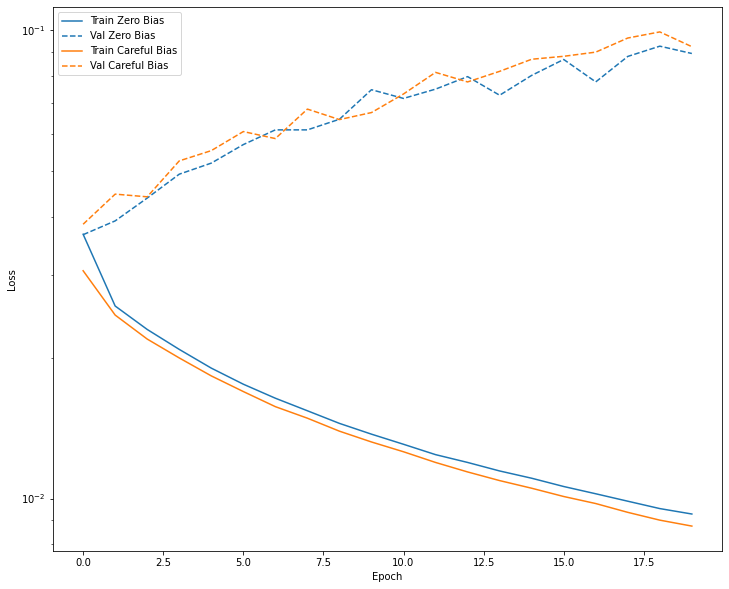

In [138]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [145]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks = [early_stopping],
    validation_data=(val_features, val_labels),
    class_weight=class_weight) 

Train on 4287360 samples, validate on 1224960 samples
Epoch 1/10
4287360/4287360 [==============================] - 261s 61us/sample - loss: 0.1962 - TP: 56167.0000 - FP: 264243.0000 - TN: 3959624.0000 - FN: 7326.0000 - accuracy: 0.9367 - precision: 0.1753 - recall: 0.8846 - auc: 0.9718 - val_loss: 0.2031 - val_TP: 21492.0000 - val_FP: 62799.0000 - val_TN: 1138352.0000 - val_FN: 2317.0000 - val_accuracy: 0.9468 - val_precision: 0.2550 - val_recall: 0.9027 - val_auc: 0.97794.0000 - FN: 4586.0000 - accuracy - ETA: 1:35 - loss: 0.2108 - TP: 32938.0000 - FP: 164955.0000 - TN: 2332380.0000  - ETA: 1:28 - loss: 0.2097 - TP: 34344.0000 - FP: 171419.0000 - TN: 2433037.0000 - FN: 4893.0000 - accuracy: 0.9333 - precision: 0.1
Epoch 2/10
4287360/4287360 [==============================] - 260s 61us/sample - loss: 0.1571 - TP: 57937.0000 - FP: 221731.0000 - TN: 4002136.0000 - FN: 5556.0000 - accuracy: 0.9470 - precision: 0.2072 - recall: 0.9125 - auc: 0.9815 - val_loss: 0.2313 - val_TP: 20619.0000 

In [146]:
def plot_metrics(history):
  metrics =  ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()


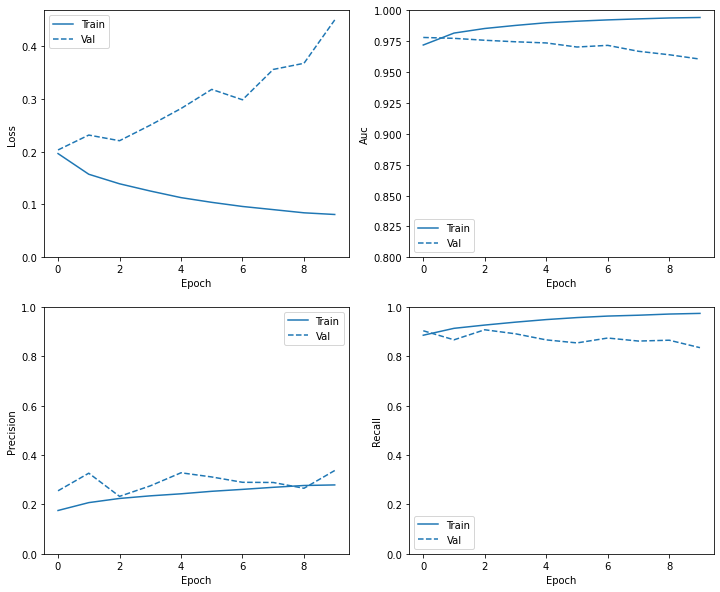

In [147]:
plot_metrics(baseline_history)

In [148]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

In [149]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Predijo una no SZ y era una no SZ (True Negatives): ', cm[0][0])
  print('Predijo una  SZ y era una no SZd (False Positives): ', cm[0][1])
  print('Predijo una no SZ y era una SZ (False Negatives): ', cm[1][0])
  print('Predijo SZ y era una SZ (True Positives): ', cm[1][1])
  print('Total SZ: ', np.sum(cm[1]))

loss :  0.2688071795664171
TP :  22064.0
FP :  47650.0
TN :  538973.0
FN :  3793.0
accuracy :  0.9160087
precision :  0.3164931
recall :  0.85330856
auc :  0.9459337

Predijo una no SZ y era una no SZ (True Negatives):  538973
Predijo una  SZ y era una no SZd (False Positives):  47650
Predijo una no SZ y era una SZ (False Negatives):  3793
Predijo SZ y era una SZ (True Positives):  22064
Total SZ:  25857


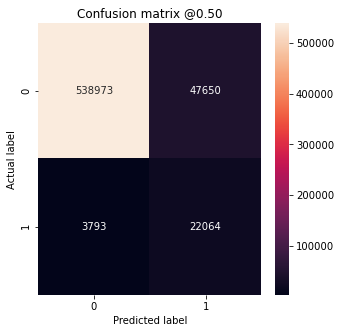

In [150]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)